# Tarea/Examen 3

A continuación están las instrucciones para cada uno de los ejercicios de su siguiente evaluación.

Recuerden leer muy bien todo lo que se les pide.

Pueden usar documentación externa para resolver algún problema, pero en todo caso tienen que explicar qué es lo que está haciendo esa solución o de dónde la obtuvieron.

El código debe de estar debidamente comentado, indicando qué es lo que están haciendo.

Recuerden las buenas prácticas al momento de nombrar variables.

Recuerden cómo es que deben de presentar una buena gráfica.


## Ejercicio 1: Las funciones de regresión

*  Escriba una función que realice todas las regresiones que vimos y que obtenga la mejor relación entre un par de variables.
*  Esta función debe realizar una regresión lineal simple, polinomial, exponencial, hiperbólica y logística.
*  Su función debe tener como parámetros de entrada dos arreglos $x$ y $y$ que sean de 1D.
*  Pruebe su función utilizando los datos vistos en la clase de Machine Learning que llevan el nombre de "Weather.csv" y con sus resultados demuestre e interprete qué relación tienen los pares de variables 1) "Temp3pm"vs "Humidity3pm", 2)  "Temp3pm"vs "Pressure3pm", y 3) "Tempmin" vs "Tempmax".





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=10,fancybox=True,shadow=True)

In [2]:
from scipy import stats

*Tabla 1. Ecuaciones de cada regresión*

<table ><tr><th >Regresión <th><th> Ecuación recta <th><th> Ecuación regresión <th><th> Disfraz  <th><th> Disfraces <tr><tr>
<tr><td> Lineal   <td><td>  y=mx+b <td><td> ŷ= β<sub>0</sub>+β<sub>1</sub>x  <td><td>  No  <td><td>No
<tr><td> Polinomial   <td><td>  y=ax<sup>b</sup> <td><td> ŷ=β<sub>0</sub>x<sup>β<sub>1</sub></sup>  <td><td>  Sí  <td><td>  y=ln(ŷ) / β<sub>0</sub>= ln(β<sub>0</sub>) / x'=ln(x)
<tr><td> Exponencial   <td><td>  y=ae<sup>bx</sup> <td><td>ŷ=β<sub>0</sub>e<sup>xβ<sub>1</sub></sup>  <td><td>  Sí <td><td> y'=ln(ŷ) / β'<sub>0</sub>= ln(β<sub>0</sub>)
<tr><td> Hiperbólica   <td><td>  y = a + <sup>b</sup>/<sub>x</sub> <td><td> ŷ=β<sub>0</sub> + <sup>β<sub>1</sub></sup>/<sub>x</sub>  <td><td>  Sí <td><td>  x'= <sup>1</sup>/<sub>x</sub>
<tr><td> Logística   <td><td>  y = <sup>1</sup>/<sub>1+e<sup>a+bx</sup></sub> <td><td> ŷ=<sup>1</sup>/<sub>1+e<sup>β<sub>0</sub>+β<sub>1</sub>x</sup></sub>  <td><td>  No <td><td> No
<table>

In [28]:
df=pd.read_csv('Weather_Data.csv')
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [35]:
def regresiones(x, y):
  #Regresión lineal
  #Calculamos m y b
  m=beta1=np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
  b=beta0=np.mean(y)-m*np.mean(x)
  #Predicción utilizando la ecuación de regresión
  predic_lineal = b + m * x

  #Regresión polinomial
  #Conversion a logaritmos
  logx=np.log(x)
  logy=np.log(y)
  res_poli = stats.linregress(logx, logy)
  b1_poli=res_poli[0]
  b0_poli=res_poli[1]
  r_poli= res_poli[2]
  # evaluamos la variable logx con estos coeficientes para obtener una prediccion y-gorrito
  predic_poli=b0_poli+b1_poli*logx
  b0real_poli=np.exp(b0_poli)
  predic_completas_poli=b0real_poli*x**b1_poli

  #Regresión exponencial
  res_expo = stats.linregress(x, logy)
  b1_expo=res_expo[0]
  b0_expo=res_expo[1]
  r_expo=res_expo[2]
  b0real_expo=np.exp(b0_expo)
  predic_completas_expo=b0real_expo*np.exp(x*b1_expo)

  #Regresión hiperbólica
  xprima=1/x
  res_hiper = stats.linregress(xprima, y)
  b1_hiper=res_hiper[0]
  b0_hiper=res_hiper[1]
  r_hiper=res_hiper[2]
  predic_hiper=b0_hiper+ b1_hiper/x

  #graficamos
  #regresión lineal
  plt.figure(figsize=(10,10),dpi=130) #gridspec_kw={'width_ratios': [3, 3]}) #el gridspec ayuda a que haya más espacio entre gráficas y un mayor eje x
  #plt.subplots_adjust(wspace=0.5)

  plt.subplot(2,2,1)
  plt.scatter(x, y, color='blue', label='Datos')
  plt.plot(x, predic_lineal, color='forestgreen',linewidth=2, label='Línea de regresión')
  grafico_linea_ts(None,None,'Variable independiente','Variable dependiente','Regresión lineal',legend=True)

  #regresión polinomial
  plt.subplot(2,2,2)
  plt.scatter(x, y, color='blue', label='Datos')
  plt.plot(x,predic_completas_poli, color='forestgreen',linewidth=2, label='Línea de regresión')
  #plt.text(8,100,"r="+str(np.around(r_poli,3)),fontsize=12)
  grafico_linea_ts(None,None,'Variable independiente','Variable dependiente','Regresión polinomial',legend=True)

  #regresión exponencial
  plt.subplot(2,2,3)
  plt.scatter(x, y, color='blue', label='Datos')
  plt.plot(x,predic_completas_expo, color='forestgreen',linewidth=2, label='Línea de regresión')
  #plt.text(8,100,"r="+str(np.around(r_expo,3)),fontsize=12)
  grafico_linea_ts(None,None,'Variable independiente','Variable dependiente','Regresión polinomial',legend=True)

  #regresión hiperbólica
  plt.subplot(2,2,4)
  plt.scatter(x, y, color='blue', label='Datos')
  plt.plot(x,predic_hiper, color='forestgreen',linewidth=2, label='Línea de regresión')
  #plt.text(8,100,"r="+str(np.around(r_hiper,3)),fontsize=12)
  grafico_linea_ts(None,None,'Variable independiente','Variable dependiente','Regresión hiperbólica',legend=True)

  plt.show()

  #La logística nunca me salió:(

In [36]:
x1 = df.Temp3pm
y1 = df.Humidity3pm
y2 = df.Pressure3pm
x2 = df.MinTemp
y3 = df.MaxTemp

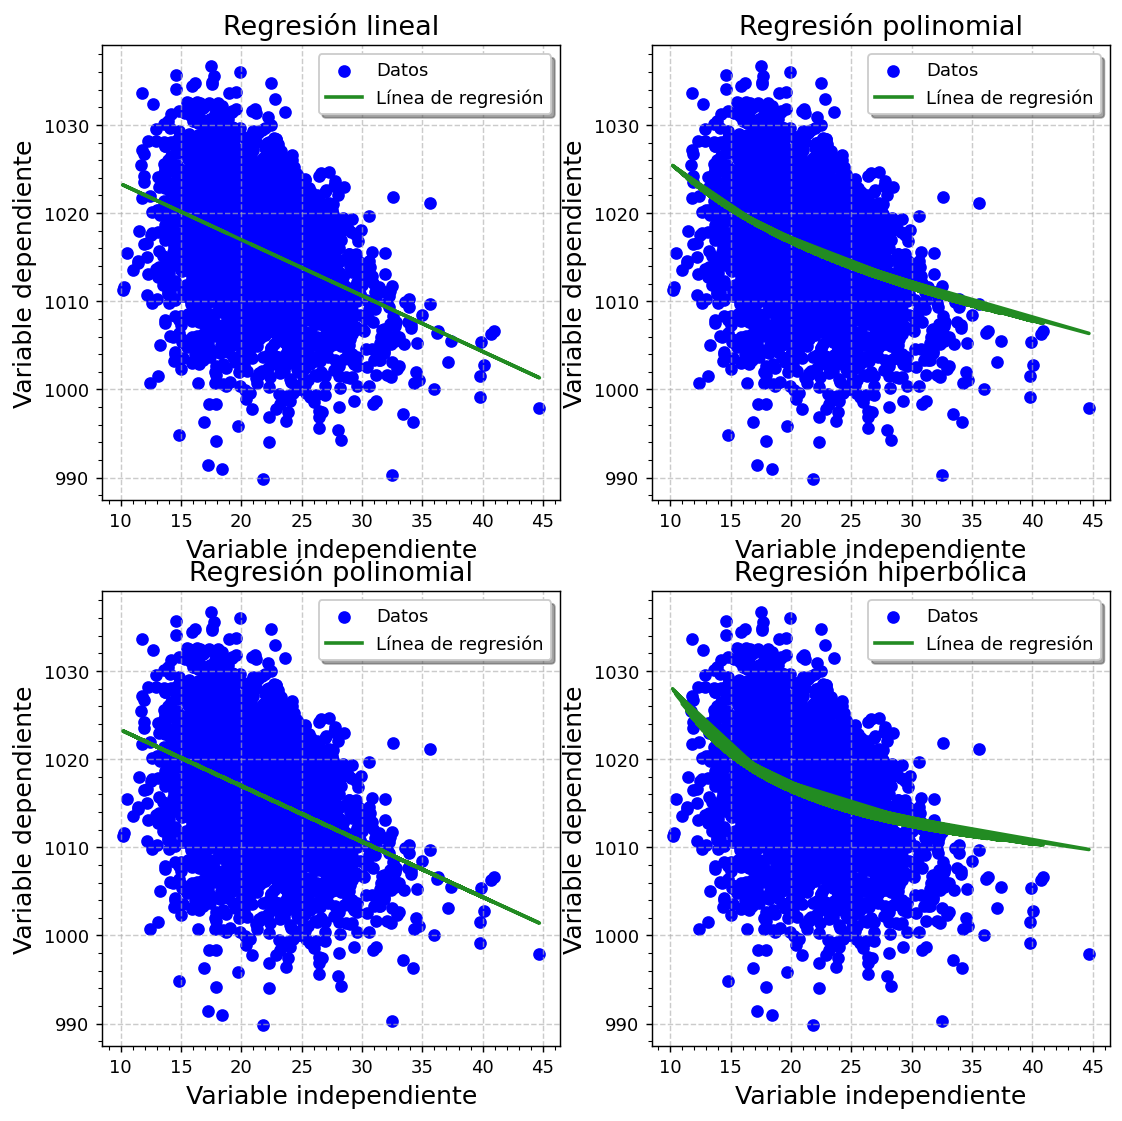

In [37]:
regresiones(x1, y2) #Temp3pm vs Humidityepm

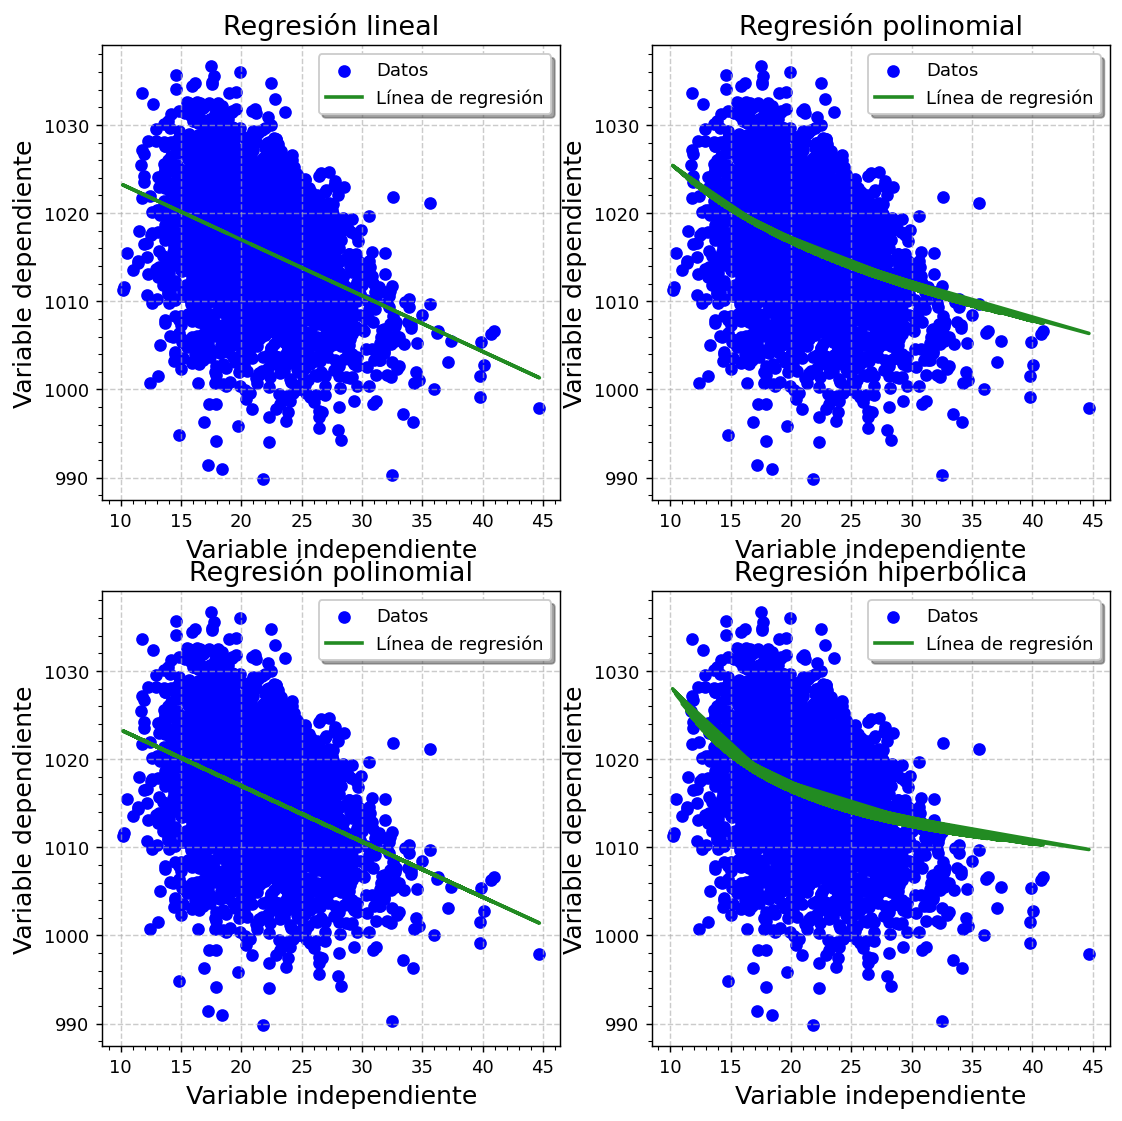

In [38]:
regresiones(x1, y2)

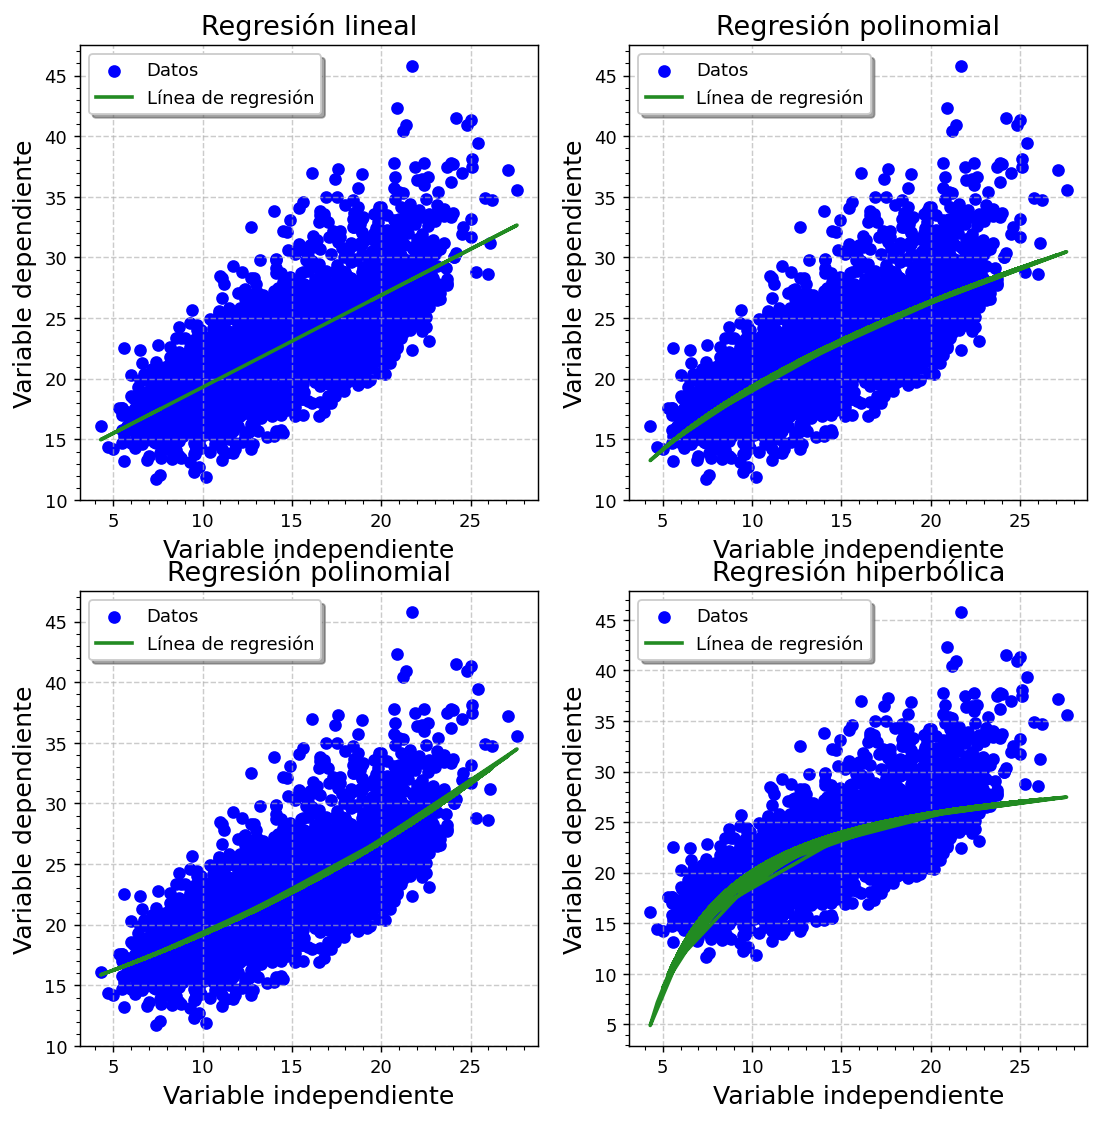

In [39]:
regresiones(x2, y3)

## Ejercicio 2: Tendencias

Un análisis de tendencia es un método utilizado para identificar patrones o cambios perceptibles en los datos a lo largo del tiempo o en relación con otras variables. El análisis de tendencia usando regresión lineal permite identificar y cuantificar cambios en los datos a lo largo del tiempo o en relación con otras variables. Específicamente, en el contexto de este ejercicio, *la tendencia* es la pendiente obtenida como coeficiente de regresión lineal cuando se analiza la serie de tiempo de una variable, como la temperatura. En este caso, la temperatura es la variable dependiente y el tiempo es la variable independiente.

*  Utilizando los datos de temperatura superficial del mar (SST) de HadSST, calcule las siguientes tendencias en unidades de grados Celsius por año:

  *  Tendencia lineal de la SST promedio global desde 1950 a la fecha.
  
  *  Tendencia lineal de la SST promedio global desde 1950 a 1980 y de 1980 a la fecha. Compare los resultados entre ambos periodos y discuta las razones posibles para las diferencias que encontró.

  * Repita los dos puntos anteriores para el promedio de la SST sobre el Golfo de México y el mar Caribe. Además utilice su función de regresión del punto 1 para determinar si la tendencia actual de la SST es lineal, polinomial o exponencial.


**Extra** +10 puntos

Considere todos los puntos de la SST cerca de México, supongamos 5-40 N y 230-290 E. Para cada punto, calcule la tendencia lineal de 1950 a la fecha y muestre sus resultados para el coeficiente asociado a la pendiente o tendencia como un mapa.  

In [5]:
pip install  h5netcdf

In [6]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.5 MB/s eta 0:00:00


In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
pip install xarray

In [9]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
# abrimos el dataset
df=xr.open_dataset('HadSST.4.0.1.0_median (1).nc')
df

<xarray.Dataset>
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T...
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

In [11]:
#Ejercicio 2.1
tos = df['tos'] - 273.15 #le restamos para pasar a grados celsius
time1_tos=tos[(tos.time.dt.year>=1950)]
time2_tos=tos[(tos.time.dt.year>=1950)&(tos.time.dt.year<=1980)]
time3_tos=tos[(tos.time.dt.year>=1980)]

In [12]:
prom1 = time1_tos.mean(['longitude', 'latitude'])
prom2 = time2_tos.mean(['longitude', 'latitude'])
prom3 = time3_tos.mean(['longitude', 'latitude'])

In [13]:
#Vector de tiempo que será nuestra X
x1 = np.arange(0, len(prom1.time))
x2 = np.arange(0, len(prom2.time))
x3 = np.arange(0, len(prom3.time))

In [14]:
#El data restante será nuestra y
y1 = prom1.data
y2 = prom2.data
y3 = prom3.data

In [15]:
# Calcular m y b de la ec. de regresión lineal
m1 = np.sum((x1 - np.mean(x1)) * (y1 - np.mean(y1))) / np.sum((x1 - np.mean(x1))**2)
b1 = np.mean(y1) - m1 * np.mean(x1)
#Predicción utilizando la ecuación de regresión
predic1 = b1 + m1 * x1

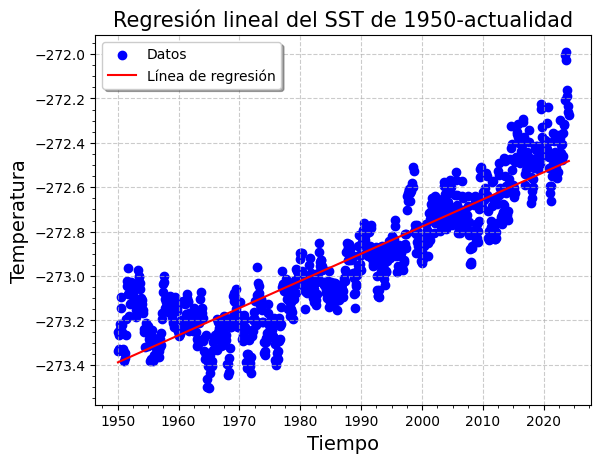

In [16]:
#plt.figure(figsize=(10,10),dpi=130)
#plt.subplot(2,2,1)
plt.scatter(time1_tos.time, prom1, color='blue', label='Datos')
plt.plot(time1_tos.time, predic1, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del SST de 1950-actualidad',legend=True)

In [17]:
#Ejercicio 2.2
# Calcular m y b de la ec. de regresión lineal
m2 = np.sum((x2 - np.mean(x2)) * (y2 - np.mean(y2))) / np.sum((x2 - np.mean(x2))**2)
b2 = np.mean(y2) - m2 * np.mean(x2)
#Predicción utilizando la ecuación de regresión
predic2 = b2 + m2 * x2

# Calcular m y b de la ec. de regresión lineal
m3 = np.sum((x3 - np.mean(x3)) * (y3 - np.mean(y3))) / np.sum((x3 - np.mean(x3))**2)
b3 = np.mean(y3) - m3 * np.mean(x3)
#Predicción utilizando la ecuación de regresión
predic3 = b3 + m3 * x3

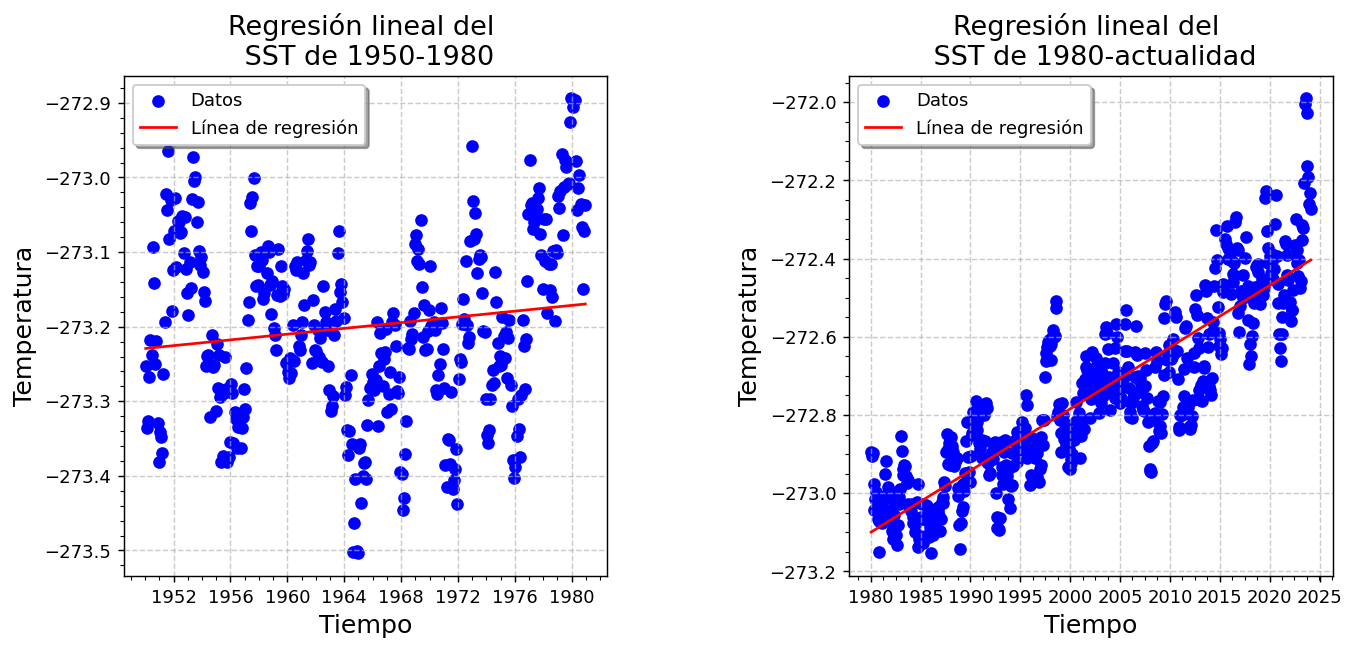

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=130, gridspec_kw={'width_ratios': [3, 3]}) #el gridspec ayuda a que haya más espacio entre gráficas y un mayor eje x

plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.scatter(time2_tos.time, prom2, color='blue', label='Datos')
plt.plot(time2_tos.time, predic2, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n SST de 1950-1980',legend=True)

plt.subplot(1,2,2)
plt.scatter(time3_tos.time, prom3, color='blue', label='Datos')
plt.plot(time3_tos.time, predic3, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n SST de 1980-actualidad',legend=True)

plt.show()

Se observa un aumento en la tendencia a partir de 1980, además de tener datos más correlacionados hacia la regresión que de 1950 a 1980. Asimismo, la tendencia de la temperatura para el 2025 consta de un mayor aumento al promedio de la temperatura actual. Finalmente, el aumento de temperatura superficial del mar se puede atribuir a la acumulación de gases de efecto invernadero, como lo son el CO2, CH4 y el N2O.

In [19]:
#Ejercicio 2.3
#Coodenadas del Golfo de México
gm1 = time1_tos.sel(latitude=slice(22, 30), longitude=slice(85, 97))
gm2 = time2_tos.sel(latitude=slice(22, 30), longitude=slice(85, 97))
gm3 = time3_tos.sel(latitude=slice(22, 30), longitude=slice(85, 97))

#Coordenadas del mar Caribe
cari1 = time1_tos.sel(latitude=slice(9, 20), longitude=slice(64, 80))
cari2 = time2_tos.sel(latitude=slice(9, 20), longitude=slice(64, 80))
cari3 = time3_tos.sel(latitude=slice(9, 20), longitude=slice(64, 80))

In [20]:
prom_gm1 = gm1.mean(['longitude', 'latitude'])
prom_gm2 = gm2.mean(['longitude', 'latitude'])
prom_gm3 = gm3.mean(['longitude', 'latitude'])

prom_cari1 = cari1.mean(['longitude', 'latitude'])
prom_cari2 = cari2.mean(['longitude', 'latitude'])
prom_cari3 = cari3.mean(['longitude', 'latitude'])


In [21]:
#Vector de tiempo que será nuestra X de GM
x1_gm = np.arange(0, len(prom_gm1.time))
x2_gm = np.arange(0, len(prom_gm2.time))
x3_gm = np.arange(0, len(prom_gm3.time))
#El data restante será nuestra Y de GM
y1_gm = prom_gm1.data
y2_gm = prom_gm2.data
y3_gm = prom_gm3.data

#Vector de tiempo que será nuestra X de cari
x1_car = np.arange(0, len(prom_cari1.time))
x2_car = np.arange(0, len(prom_cari2.time))
x3_car = np.arange(0, len(prom_cari3.time))
#El data restante será nuestra y de cari
y1_car = prom_cari1.data
y2_car = prom_cari2.data
y3_car = prom_cari3.data


In [22]:
# Calcular m y b de la ec. de regresión lineal
m1_gm = np.sum((x1_gm - np.mean(x1_gm)) * (y1_gm - np.mean(y1_gm))) / np.sum((x1_gm - np.mean(x1_gm))**2)
b1_gm = np.mean(y1_gm) - m1_gm * np.mean(x1_gm)
#Predicción utilizando la ecuación de regresión
predic1_gm = b1_gm + m1_gm * x1_gm

# Calcular m y b de la ec. de regresión lineal
m1_car = np.sum((x1_car - np.mean(x1_car)) * (y1_car - np.mean(y1_car))) / np.sum((x1_car - np.mean(x1_car))**2)
b1_car = np.mean(y1_car) - m1_car * np.mean(x1_car)
#Predicción utilizando la ecuación de regresión
predic1_car = b1_car + m1_car * x1_car

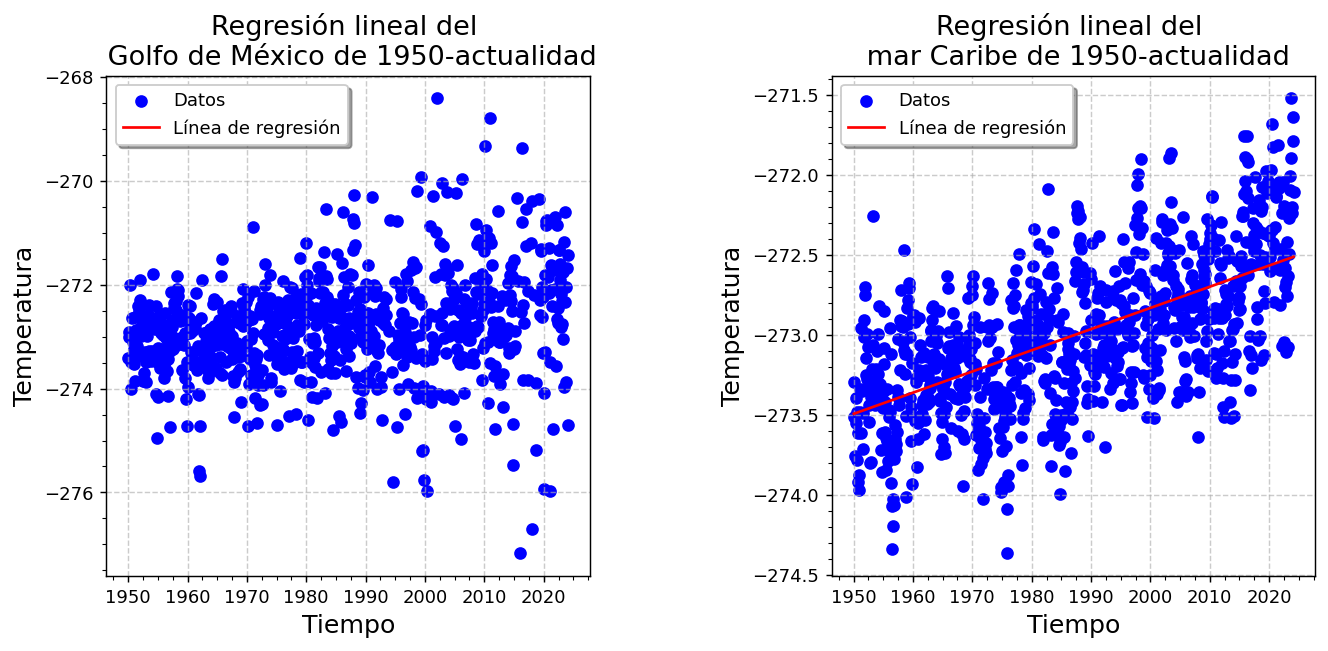

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=130, gridspec_kw={'width_ratios': [3, 3]}) #el gridspec ayuda a que haya más espacio entre gráficas y un mayor eje x

plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.scatter(gm1.time, prom_gm1, color='blue', label='Datos')
plt.plot(gm1.time, predic1_gm, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n Golfo de México de 1950-actualidad',legend=True)

plt.subplot(1,2,2)
plt.scatter(cari1.time, prom_cari1, color='blue', label='Datos')
plt.plot(cari1.time, predic1_car, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n mar Caribe de 1950-actualidad',legend=True)

plt.show()

#No sé por qué mi línea de tendencia para el golfo sale como "NaN" :(

In [24]:
# Calcular m y b de la ec. de regresión lineal
m2_gm = np.sum((x2_gm - np.mean(x2_gm)) * (y2_gm - np.mean(y2_gm))) / np.sum((x2_gm - np.mean(x2_gm))**2)
b2_gm = np.mean(y2_gm) - m2_gm * np.mean(x2_gm)
#Predicción utilizando la ecuación de regresión
predic2_gm = b2_gm + m2_gm * x2_gm

# Calcular m y b de la ec. de regresión lineal
m3_car = np.sum((x3_car - np.mean(x3_car)) * (y3_car - np.mean(y3_car))) / np.sum((x3_car - np.mean(x3_car))**2)
b3_car = np.mean(y3_car) - m3_car * np.mean(x3_car)
#Predicción utilizando la ecuación de regresión
predic3_car = b3_car + m3_car * x3_car

# Calcular m y b de la ec. de regresión lineal
m3_gm = np.sum((x3_gm - np.mean(x3_gm)) * (y3_gm - np.mean(y3_gm))) / np.sum((x3_gm - np.mean(x3_gm))**2)
b3_gm = np.mean(y3_gm) - m3_gm * np.mean(x3_gm)
#Predicción utilizando la ecuación de regresión
predic3_gm = b3_gm + m3_gm * x3_gm

# Calcular m y b de la ec. de regresión lineal
m2_car = np.sum((x2_car - np.mean(x2_car)) * (y2_car - np.mean(y2_car))) / np.sum((x2_car - np.mean(x2_car))**2)
b2_car = np.mean(y2_car) - m2_car * np.mean(x2_car)
#Predicción utilizando la ecuación de regresión
predic2_car = b2_car + m2_car * x2_car

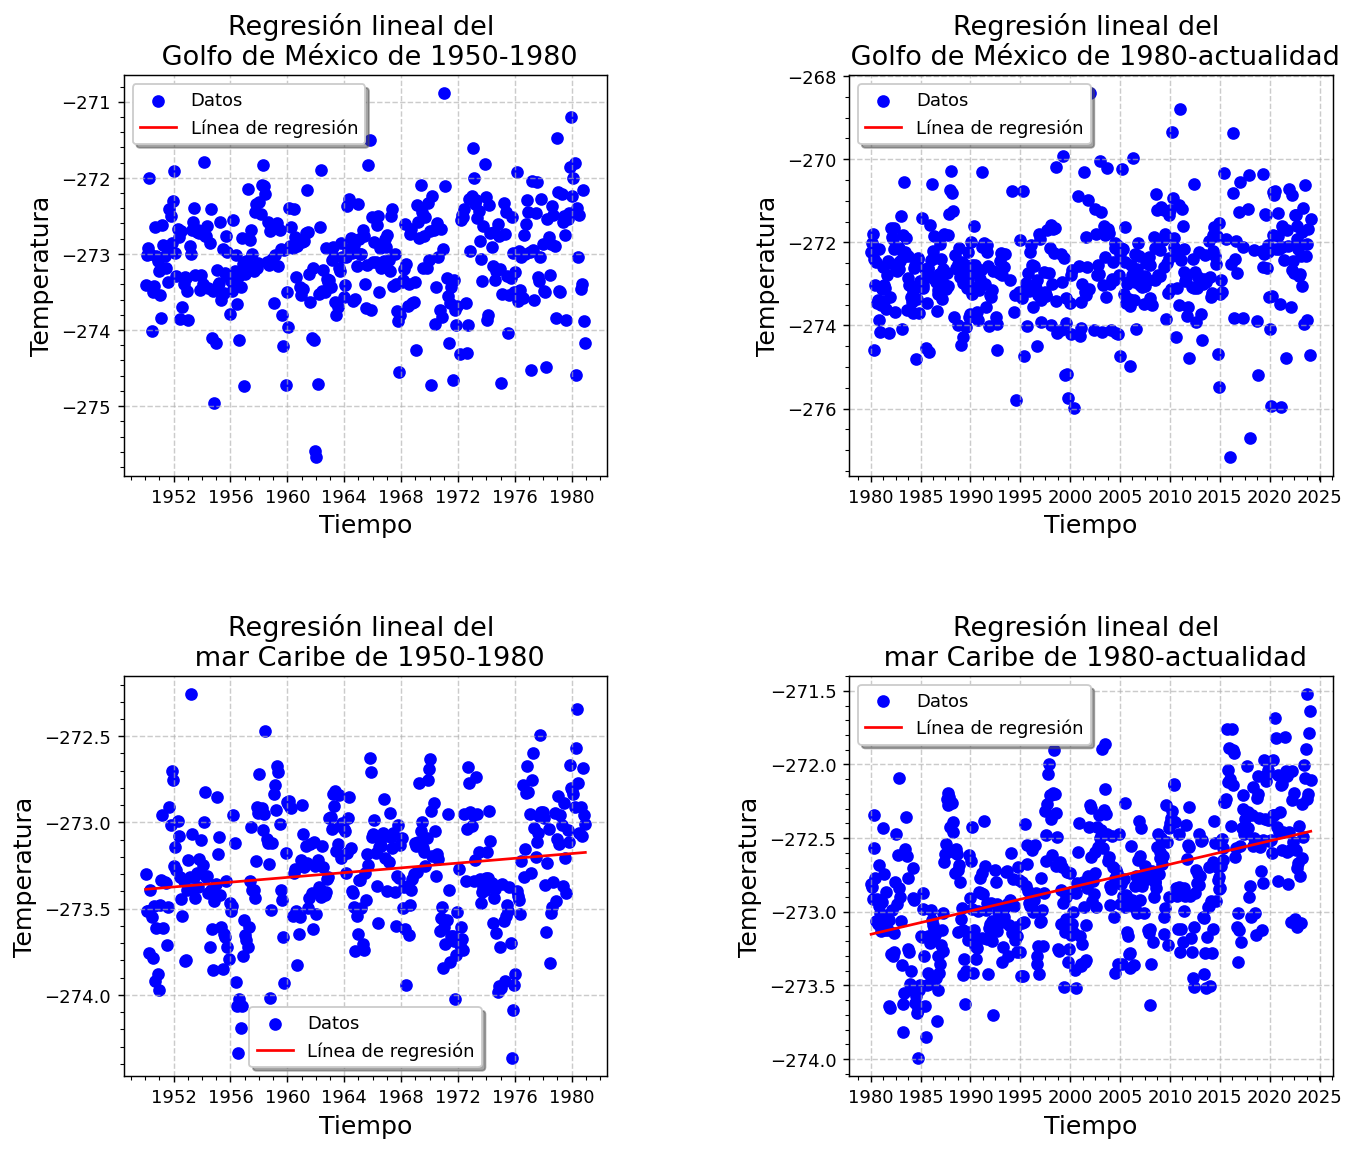

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=130, gridspec_kw={'width_ratios': [3, 3]}) #el gridspec ayuda a que haya más espacio entre gráficas y un mayor eje x

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2,2,1)
plt.scatter(gm2.time, prom_gm2, color='blue', label='Datos')
plt.plot(gm2.time, predic2_gm, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n Golfo de México de 1950-1980',legend=True)

plt.subplot(2,2,2)
plt.scatter(gm3.time, prom_gm3, color='blue', label='Datos')
plt.plot(gm3.time, predic3_gm, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n Golfo de México de 1980-actualidad',legend=True)

plt.subplot(2,2,3)
plt.scatter(cari2.time, prom_cari2, color='blue', label='Datos')
plt.plot(cari2.time, predic2_car, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n mar Caribe de 1950-1980',legend=True)

plt.subplot(2,2,4)
plt.scatter(cari3.time, prom_cari3, color='blue', label='Datos')
plt.plot(cari3.time, predic3_car, color='red', label='Línea de regresión')
grafico_linea_ts(None,None,'Tiempo','Temperatura','Regresión lineal del \n mar Caribe de 1980-actualidad',legend=True)

plt.show()

Para el mar del Caribe y el Golfo de México se observa una distribución de datos más homogéneo a partir de 1980. De igual manera como en el ejercicio anterior, la línea de tendencia aumenta con el paso de los años, lo que indica y corrobora el calentamiento global.

## Ejercicio 3: Evolución decadal

Gracias a que tenemos más datos, podemos hacer análisis de mayor extensión de tiempo.
En este lugar de estudio uno de los meses más cálidos es enero, y veremos su comportamiento a lo largo de las décadas.
Utilizando los datos: "temp_1950_2023.nc" hagan lo siguiente:



*   Realicen mapas de anomalías de cada década completa disponible: 1950-1959, 1960-1969 etc. El periodo de referencia a tomar es: 1981 - 2010.
*   Realicen un gráfico de barras en donde se muestren las anomalías de área de cada una de las décadas. El periodo de referencia a tomar también es el de 1981 - 2010.


¿Cómo es el comportamiento de la temperatura de cada década?
¿Qué ocurre si cambian el periodo de referencia? Por ejemplo: 1950 - 1981 o 1991 - 2020? ¿Se respeta el comportamiento o cambia algo? ¿Por qué?

Notas:
* En el segundo punto las anomalías de área se refiere a que tienen que hacer el promedio de área por cáda década y cada barra representa cada década.
* Las unidades deben de estar en grados Celsius.
* El colorbar y los ticks deben de ser los mismos para todos los mapas.





## Ejercicio 4: Temperatura del Golfo de México

Ya han trabajado con las temperaturas en el Golfo. Utilizando la base de datos "Golfo.nc" hagan lo siguiente:



*   Hagan el promedio de todos los veranos por cada año (JJA), posteriormente promedien en el área y hagan un gráfico de barras en donde muestren las anomalías de temperatura de cada año, el periodo base a utilizar es: 1980 - 2000

*   Encontrar cuál fue el año más frío y más cálido (no vale a ojo).
* Hacer un mapa de anomalía donde muestren el año más frío y más cálido que encontraron en el punto anterior. El periodo base es el mismo que en el primer punto.


Notas:

*   Las unidades deben de estar en grados Celsius







## Ejercicio 5: Extremos en una tabla

Recuerden que otra manera de ver extremos es mediante el uso de tablas, en donde señalen cierta característica. Para este ejercicio utilizarán el archivo llamado: "Laminas_TAVG.csv". Como podrán imaginar son datos de temperatura promedio de un lugar. Su trabajo consiste en:



*   Calcular las anomalías estandarizadas por columna (es decir por mes), tomando como periodo de referencia los años 1980 - 2010.

*   Deberán poner colores a las celdas dependiendo de los valores de la anomalía: Para valores por arriba de 2 D.E. usen rojo oscuro, para valores entre 1 y 2 D.E. usen naranja. Para valores por debajo de -2 D.E. Usen azul oscuro, para valores entre 1 y 2 D.E. usen azul claro. Los valores que estén entre -0.5 y 0.5 utilicen gris.

* Expliquen sus resultados

# Ejercicio 6

Considera la base de datos de cobertura de vegetación "covtype.csv".

1. Construye un código de clasificación utilizando *scikit-learn* para hacer clasificación logística multivariada. Este código debe tomar un cierto número de variables incluidas en la base de datos con el objetivo de clasificar al tipo de cobertura. Este código debe hacer el proceso de separar los datos en una porción de datos tipo "train" y otra tipo "test" como se vio en clase. Su código debe funcionar para cualquier número de variables predictoras y para predecir cualquiera de todas las coberturas de vegetación.

2. La función o código construido debe además reportar resultados o métricas de evaluación del modelo como lo son el Error Absoluto Medio, Error Cuadrático Medio, Coeficiente de Determinación para cada evaluación del modelo.

3. Muestre que su función es útil, tomando primero como ejemplo a la categoría de tipo de vegetación C3 y use su función para clasificarla correctamente utilizando 6 variables (las que usted guste) como predictoras para la clasificación. Repita el análisis pero utilizando sólo 3 variables. Explique sus resultados concienzudamente y determine cuál de los dos modelos de clasificación ¿y qué implicaciones tiene? ¿usted terminó con un buen modelo para categorizar vegetación?

*Extra (+10 puntos)*
Utilizando lo aprendido en sus clases de ML, construya un modelo de clasificación que sea mejor que el logístico de este ejercicio. Muestre, a través de la evaluación de las métricas de rendimiento que efectivamente es mejor su nuevo modelo de ML.

## Ejercicio 7: Percentiles de lluvia

Para este ejercicio, utilizaran los datos que se llaman "Ejercicio_7.nc" que contiene datos de precipitación. Con ellos deberán de hacer lo siguiente:



*   Obtengan el promedio de área de todos los años.
*   Obtengan los percentiles 1 y 99 y encuentren los años que están por debajo del P1 y por arriba del P99.
* Obtengan la anomalía entre los años más lluviosos y los más secos. Pueden tomar de referencia el que ustedes gusten.
* Expliquen qué significa el mapa que obtuvieron.



NOTA:
* Si hay más de un año dentro de cada categoría de los percentiles obtengan el promedio de todos.
* Las unidades deben de estar expresadas en mm/mes.




# Ejercicio 8 (Extra - ML)

### Valor de 20 de 100 puntos sobre la calificación de este examen

La base de datos **'ROCLOUD'** presenta el tamaño de los ciclones tropicales (CTs) del Atlántico usando un radio desde el centro del CT hasta el punto más lejano donde se reportan nubes en imagenes infrarrojas.

El objetivo de este ejercicio es clasificar a los CTs, específicamente evaluar si un CT es categorizado como grande, mediano y pequeño a partir de las condiciones de la atmósfera en función de ciertos parámetros:

A) Es grande si el radio del CT supera los 750 km.

B) Es pequeño si el radio del CT es menor a los 550 km.

C) Es mediano si el radio del CT está entre los dos valores anteriores.

Los datos que quieren usarse como variables predictoras para la clasificación son:
 - la posición de la tormenta (lon,lat)
 - la velocidad máxima del viento (MWS)
 - la presión mínima en el centro de la tormenta
 - la humedad a 500 mb
 - la cizalladura del viento
 - la velocidad vertical
 - la vorticidad a 500 mb
 - el tamaño del ciclón tropical

### *Procedimiento*

a) Crear una nueva columna categórica para los tamaños del CT.

b) Realizar una transformación de las variables para que cada una tenga una media de cero y una desviación estandar de 1 (distribución normal o estándar).

c) Dividir los datos para ingresar en los modelos y posteriormente secciona las variables en 70% para entrenamiento y 30% para prueba (utilizando la función de scikit-learn).

d) Utiliza los modelos de clasificación vistos en clase (KNN, SVM y árbol de decisión) para predecir las variables.

e) Evalúa todos los modelos utilizando las métricas de evaluación vistas en clase y determina ¿cuál es el mejor modelo para alcanzar los objetivos de clasificación de tamaño? ¿El mejor modelo es un buen modelo?

Notas:
- ANTES de comenzar revisa los datos para que estés seguro que estén limpios de nulos, o que no haya información extraña.
- Para las métricas de evaluación considera que la clasificación NO ES BINARIA, LEE LA DOCUMENTACIÓN DE LAS FUNCIONES PARA QUE NO TE SALGA ERROR.
